<a href="https://colab.research.google.com/github/surajn581/covid19_detection/blob/master/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Image size before resizing:  (1420, 1440, 3)
Image size after resizing:  (250, 250, 3)


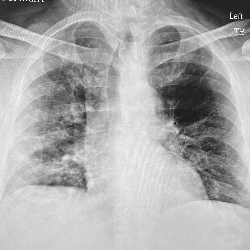

In [ ]:
# img = load_img('COVID-00016.jpg')  # this is an image
img = cv2.imread('COVID-00016.jpg')
print('Image size before resizing: ',img.shape)
img = cv2.resize(img, dsize=(250, 250))
print('Image size after resizing: ',img.shape)
cv2_imshow(img)

In [ ]:
print('Image shape before transformation: ',img.shape)
x = img_to_array(img)  # this is a Numpy array with shape (250, 250, 3)
# x = np.transpose(x, [2, 0, 1])
print('Image shape after transformation: ',x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 250, 250, 3)
print('Image shape after adding dimension: ',x.shape)

Image shape before transformation:  (250, 250, 3)
Image shape after transformation:  (250, 250, 3)
Image shape after adding dimension:  (1, 250, 250, 3)


In [ ]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='covid', save_format='jpeg'):
    i += 1
    if i > 5:
        break  # otherwise the generator would loop indefinitely

In [ ]:
from IPython.display import Image, display
from glob import glob
listofImageNames = glob('**/*.JPG', recursive=True)
for imageName in listOfImageNames:
    display(Image(filename=imageName))
    print(imageName)